In [296]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [297]:
data = np.load('data/10_neurons_1000000_timesteps_20Hz.npz', allow_pickle=True)
spikes = torch.tensor(data['X'])
W0 = torch.tensor(data['W0'])

In [298]:
theta = torch.tensor(2.9943)

In [299]:
true_effect = torch.sigmoid(W0 - theta) - torch.sigmoid(-theta)

In [300]:
n_neurons = W0.shape[0]

In [301]:
torch.sigmoid(W0 - theta)

tensor([[0.0477, 0.0477, 0.1465, 0.0477, 0.1684, 0.1192, 0.0477, 0.0477, 0.0477,
         0.1706],
        [0.0936, 0.0477, 0.3568, 0.1743, 0.0736, 0.0477, 0.0518, 0.0477, 0.3622,
         0.0999],
        [0.2613, 0.0477, 0.0477, 0.1001, 0.0477, 0.1092, 0.2386, 0.0477, 0.0477,
         0.0477],
        [0.1027, 0.0477, 0.0477, 0.0477, 0.0477, 0.0477, 0.0528, 0.1191, 0.0477,
         0.2730],
        [0.0477, 0.1308, 0.0477, 0.2165, 0.0477, 0.1389, 0.0477, 0.1632, 0.0802,
         0.0477],
        [0.0367, 0.0028, 0.0477, 0.0100, 0.0477, 0.0477, 0.0325, 0.0008, 0.0146,
         0.0477],
        [0.0477, 0.0477, 0.0477, 0.0477, 0.0477, 0.0330, 0.0477, 0.0022, 0.0477,
         0.0477],
        [0.0477, 0.0159, 0.0477, 0.0477, 0.0041, 0.0477, 0.0477, 0.0477, 0.0287,
         0.0140],
        [0.0477, 0.0182, 0.0459, 0.0477, 0.0319, 0.0467, 0.0477, 0.0477, 0.0477,
         0.0477],
        [0.0018, 0.0477, 0.0388, 0.0477, 0.0477, 0.0477, 0.0193, 0.0477, 0.0477,
         0.0477]])

In [302]:
n_neurons

10

In [303]:
target_neuron = n_neurons - 1
X = spikes[:target_neuron]
y = spikes[target_neuron]

In [304]:
linear_model = LinearRegression()

In [305]:
linear_model.fit(X.T, torch.roll(y, -1).T)
effect_predicted = linear_model.predict(torch.eye(n_neurons-1)) # spiking prob if neuron X is active minus if it is inactive

In [306]:
linear_model.coef_

array([ 0.0759079 ,  0.02709809,  0.00484662,  0.12798445,  0.00426962,
        0.00289171,  0.00075971, -0.01970917,  0.00401911])

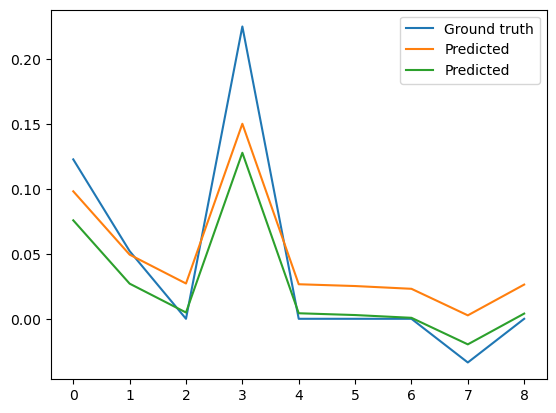

In [309]:
#plt.plot(torch.sigmoid(W0 - theta)[:,target_neuron])
plt.plot(true_effect[:-1, target_neuron], label = 'Ground truth')
#plt.plot(W0[:-1, target_neuron])
plt.plot(effect_predicted, label = 'Predicted')
plt.plot(linear_model.coef_, label = 'Predicted')
plt.legend()

In [290]:
linear_model = sm.OLS(np.array(torch.roll(y, -1).T), np.array(sm.add_constant(X.T)))

In [291]:
results = linear_model.fit()

In [292]:
effect_predicted = results.params

In [293]:
effect_predicted.shape

(10,)

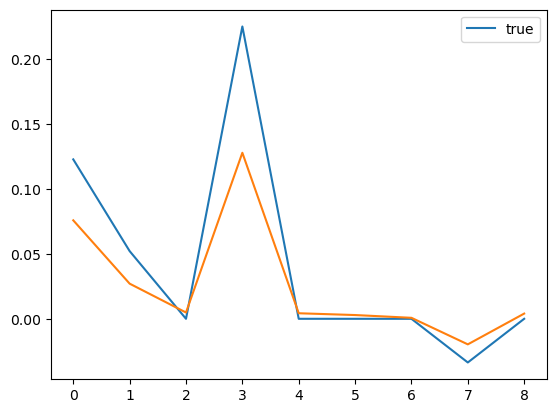

In [295]:
plt.plot(true_effect[:-1, target_neuron], label='true')
plt.plot(effect_predicted[1:])
#plt.plot(results.params[1:], label = 'predicted')
#plt.plot(index_discovered, np.zeros_like(index_discovered), '.')
plt.legend()

In [278]:
edge_discovered = results.t_test(np.eye(n_neurons)).pvalue < 0.05
edge_discovered = edge_discovered
true_edge = W0 != 0

In [279]:
print(results.t_test(np.eye(n_neurons)))
print(edge_discovered)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0224      0.000    122.626      0.000       0.022       0.023
c1             0.0759      0.001     74.009      0.000       0.074       0.078
c2             0.0271      0.001     24.444      0.000       0.025       0.029
c3             0.0048      0.001      4.849      0.000       0.003       0.007
c4             0.1280      0.001    126.959      0.000       0.126       0.130
c5             0.0043      0.001      4.038      0.000       0.002       0.006
c6             0.0029      0.001      2.854      0.004       0.001       0.005
c7             0.0008      0.001      0.732      0.464      -0.001       0.003
c8            -0.0197      0.001    -18.223      0.000      -0.022      -0.018
c9             0.0040      0.001      3.940      0.0

In [274]:
confusion_matrix = metrics.confusion_matrix(true_edge, edge_discovered)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

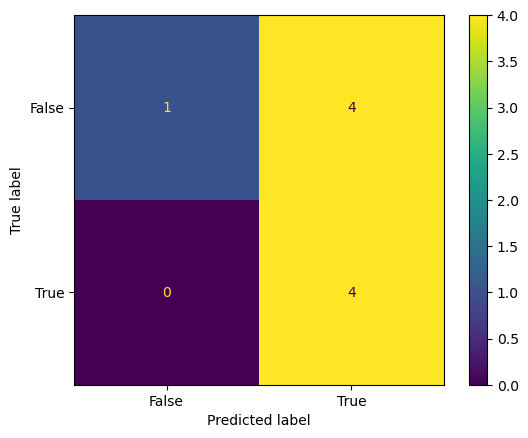

In [268]:
cm.plot()
plt.show()